# Contours
## 概念
凸包
## 说明
1)img.copy(),建立img副本，之后的操作在副本上进行，而对img无影响；
## 参考资料
[1] opencv-python-tutorials.pdf  
[2] [OpenCV入门之寻找图像的凸包（convex hull）](https://www.cnblogs.com/jclian91/p/9728488.html)

In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt

In [2]:
# 新建512*512的空白图片
img = np.zeros((512,512,3), np.uint8)
# 平面点集
pts = np.array([[200,250],[250,300],[300,270],[270,200],[120,240]],np.int32)
pts = pts.reshape((-1,1,2))
# 绘制填充的多边形
cv2.fillPoly(img,[pts],(255,255,255))
# 保存图片
cv2.imwrite('polygon.png',img)
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

## 画出指定索引的轮廓

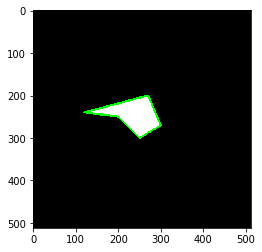

In [3]:
cnt = contours[0]
dstImg=cv2.drawContours(img.copy(), [cnt], -1, (0,255,0), 3)
plt.imshow(dstImg,'gray')

## 画出所有轮廓

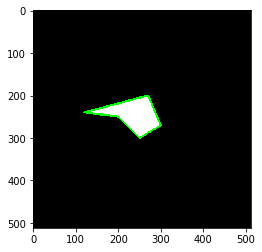

In [4]:
allContours=cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)
plt.imshow(allContours,'gray')

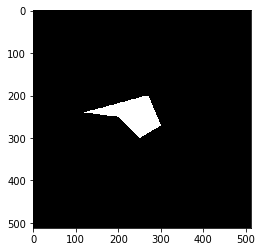

In [5]:
plt.imshow(img,'gray')

1


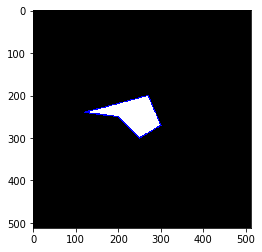

In [6]:
length = len(contours)
print(length)
for i in range(length):
    cnt = contours[i]
    epsilon = 0.001 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    # cv2.drawContours(img, approx, -1, (0, 0, 255), 3)
    polylinesImg = cv2.polylines(img, [approx], True, (0, 0, 255), 2)
plt.imshow(polylinesImg)

In [7]:
img=cv2.imread('polygon.png',1)

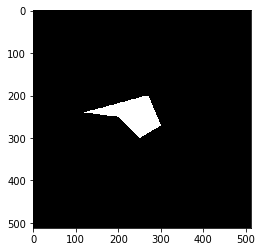

In [8]:
plt.imshow(img)

## 寻找凸包并绘制凸包（轮廓）

[[[300 270]]

 [[299 271]]

 [[254 298]]

 [[250 300]]

 [[120 240]]

 [[122 239]]

 [[257 203]]

 [[269 200]]

 [[270 200]]

 [[273 206]]

 [[300 269]]]


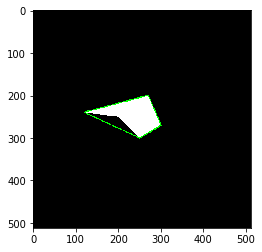

In [9]:
contours, hierarchy = cv2.findContours(thresh, 2, 1)
cnt = contours[0]
# 寻找凸包并绘制凸包（轮廓）
hull = cv2.convexHull(cnt)
print(hull)

length = len(hull)
for i in range(len(hull)):
    cv2.line(img, tuple(hull[i][0]), tuple(hull[(i+1)%length][0]), (0,255,0), 2)

# 显示图片
plt.imshow(img)

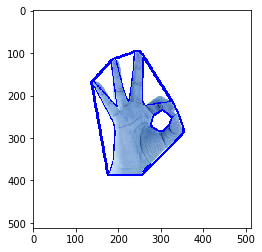

In [10]:
# 读取图片并转至灰度模式
imagepath = 'finger.png'
img = cv2.imread(imagepath, 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化，取阈值为235
ret, thresh = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY)

# 寻找图像中的轮廓
contours, hierarchy = cv2.findContours(thresh, 2, 1)

# 寻找物体的凸包并绘制凸包的轮廓
for cnt in contours:
    hull = cv2.convexHull(cnt)
    length = len(hull)
    # 如果凸包点集中的点个数大于5
    if length > 5:
        # 绘制图像凸包的轮廓
        for i in range(length):
            cv2.line(img, tuple(hull[i][0]), tuple(hull[(i+1)%length][0]), (0,0,255), 2)

# 显示图片
plt.imshow(img)